In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [17]:
df = pd.read_csv("/content/alzheimers_disease_data.csv")
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [18]:
print(df.head())

   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0     

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

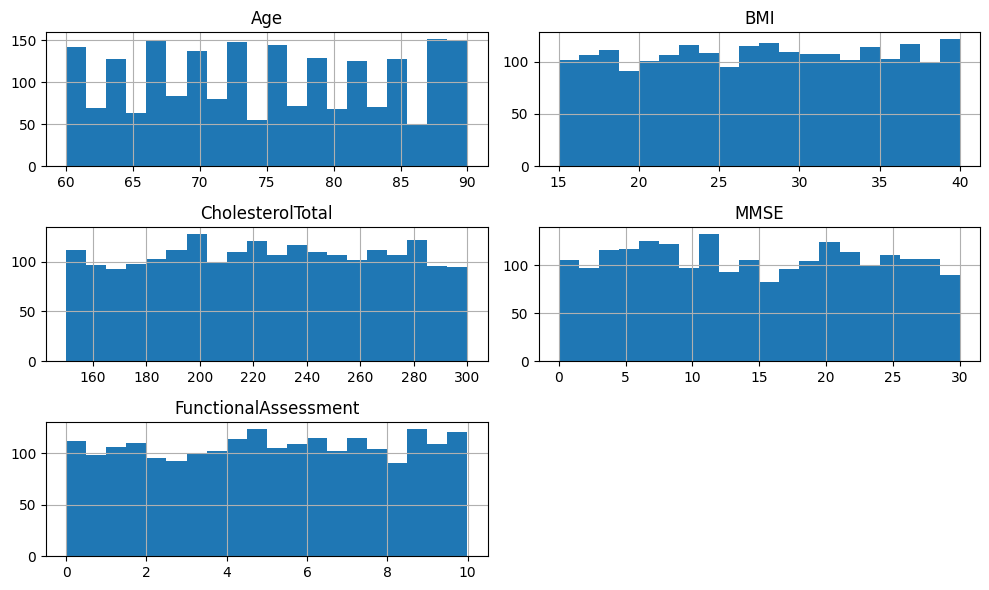

/tmp/ipython-input-2728035660.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Diagnosis", y="Age", data=df, palette="Set2")


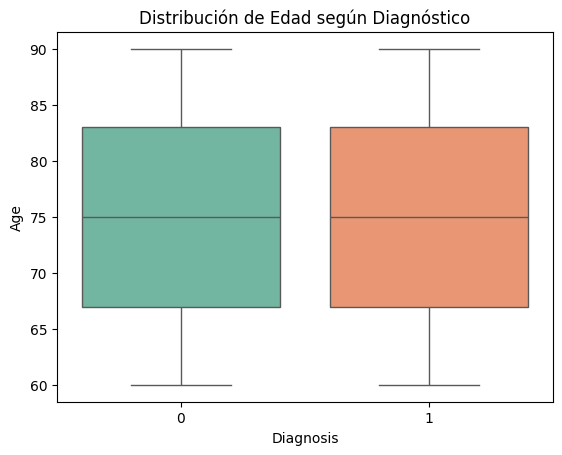

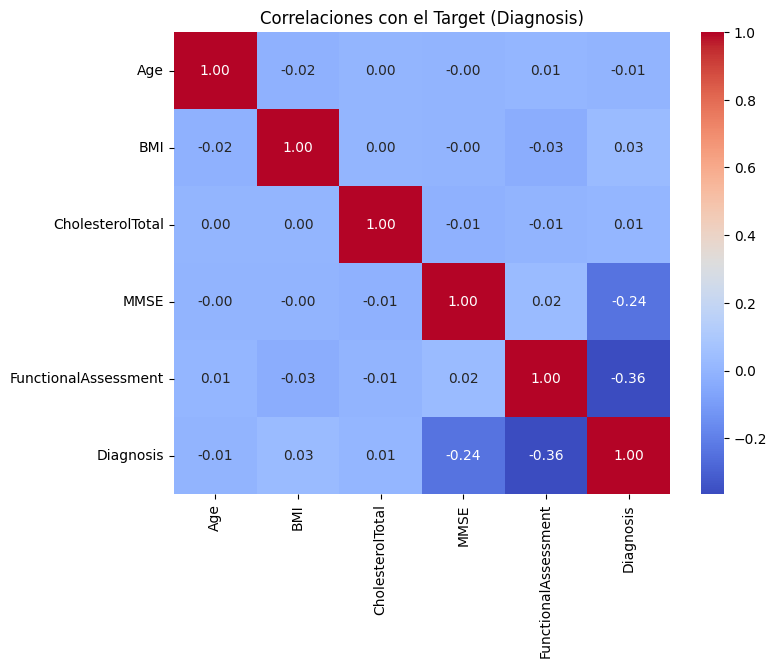

In [20]:
# 2: EDA

# Histogramas de variables numéricas
num_vars = ["Age", "BMI", "CholesterolTotal", "MMSE", "FunctionalAssessment"]
df[num_vars].hist(figsize=(10,6), bins=20)
plt.tight_layout()
plt.show()

# Boxplot Edad vs Diagnóstico
sns.boxplot(x="Diagnosis", y="Age", data=df, palette="Set2")
plt.title("Distribución de Edad según Diagnóstico")
plt.show()

# Correlaciones
corr = df[num_vars + ["Diagnosis"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones con el Target (Diagnosis)")
plt.show()

In [21]:
# 3: PROCESAMIENTO DE DATOS
# Eliminar columnas no útiles
df = df.drop(columns=["PatientID", "DoctorInCharge"])

# Definir X y y
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

# Separar tipos de variables
numeric_features = X.select_dtypes(include=["int64","float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# Preprocesamiento
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

# Dividir datos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")



Train: (1504, 32), Val: (322, 32), Test: (323, 32)


In [22]:
# 4: ENTRENAMIENTO DE MODELOS

# ---- Modelo 1: kNN ----
knn = Pipeline(steps=[("preprocessor", preprocessor),
                     ("classifier", KNeighborsClassifier(n_neighbors=5))])
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("kNN Results:")
print(classification_report(y_test, y_pred_knn))

# ---- Modelo 2: Random Forest ----
rf = Pipeline(steps=[("preprocessor", preprocessor),
                    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))])
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

# ---- Modelo 3: Red Neuronal Profunda ----
# Preprocesar manualmente para DNN
X_train_proc = preprocessor.fit_transform(X_train)
X_val_proc = preprocessor.transform(X_val)
X_test_proc = preprocessor.transform(X_test)

input_dim = X_train_proc.shape[1]

dnn = Sequential([
    Dense(64, activation="relu", input_dim=input_dim),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

dnn.compile(optimizer=Adam(learning_rate=0.001),
            loss="binary_crossentropy",
            metrics=["accuracy"])

history = dnn.fit(X_train_proc, y_train, epochs=20, batch_size=32,
                  validation_data=(X_val_proc, y_val), verbose=1)

# Evaluar en test
loss, acc = dnn.evaluate(X_test_proc, y_test, verbose=0)
print(f"DNN Accuracy en test: {acc:.3f}")

kNN Results:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       209
           1       0.61      0.45      0.52       114

    accuracy                           0.71       323
   macro avg       0.68      0.65      0.65       323
weighted avg       0.69      0.71      0.69       323

Random Forest Results:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       209
           1       0.93      0.89      0.91       114

    accuracy                           0.94       323
   macro avg       0.94      0.93      0.93       323
weighted avg       0.94      0.94      0.94       323

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5601 - loss: 0.6843 - val_accuracy: 0.6522 - val_loss: 0.6082
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6642 - loss: 0.6140 - val_accuracy: 0.7081 - val_loss: 0.5443
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7397 - loss: 0.5392 - val_accuracy: 0.7950 - val_loss: 0.4663
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7694 - loss: 0.4938 - val_accuracy: 0.8416 - val_loss: 0.4218
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7883 - loss: 0.4698 - val_accuracy: 0.8540 - val_loss: 0.4108
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8082 - loss: 0.4406 - val_accuracy: 0.8696 - val_loss: 0.3942
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8422 - loss: 0.3695 - val_accuracy: 0.8634 - val_loss: 0.3876
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8382 - loss: 0.3821 - val_accuracy: 0.8634 - val_loss: 0.3873
Epo

In [23]:
# TABLA COMPARATIVA
results = {
    "Modelo": ["kNN", "Random Forest", "DNN"],
    "Accuracy Test": [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_rf),
        acc
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


          Modelo  Accuracy Test
0            kNN       0.705882
1  Random Forest       0.938080
2            DNN       0.817337


In [24]:
# 5: PRUEBA CON MUESTRA ARTIFICIAL

# Crear un paciente ficticio
# (los valores deben estar en rangos similares a los del dataset original)
sample_patient = pd.DataFrame([{
    "Age": 78,
    "Gender": 1,  # 1 = mujer, 0 = hombre
    "Ethnicity": 0,
    "EducationLevel": 2,
    "BMI": 27.5,
    "Smoking": 0,
    "AlcoholConsumption": 5.0,
    "PhysicalActivity": 3.0,
    "DietQuality": 4.0,
    "SleepQuality": 6.0,
    "FamilyHistoryAlzheimers": 1,
    "CardiovascularDisease": 0,
    "Diabetes": 0,
    "Depression": 0,
    "HeadInjury": 0,
    "Hypertension": 1,
    "SystolicBP": 135,
    "DiastolicBP": 80,
    "CholesterolTotal": 200,
    "CholesterolLDL": 120,
    "CholesterolHDL": 50,
    "CholesterolTriglycerides": 150,
    "MMSE": 18,   # bajo → indica deterioro cognitivo
    "FunctionalAssessment": 3.0,
    "MemoryComplaints": 1,
    "BehavioralProblems": 1,
    "ADL": 4.0,
    "Confusion": 1,
    "Disorientation": 1,
    "PersonalityChanges": 1,
    "DifficultyCompletingTasks": 1,
    "Forgetfulness": 1
}])

# Predecir con el modelo elegido (Random Forest con pipeline)
prediction = rf.predict(sample_patient)[0]
probability = rf.predict_proba(sample_patient)[0][1]

print(f"Predicción: {prediction} (0 = No Alzheimer, 1 = Alzheimer)")
print(f"Probabilidad estimada de Alzheimer: {probability:.2f}")


Predicción: 1 (0 = No Alzheimer, 1 = Alzheimer)
Probabilidad estimada de Alzheimer: 0.90
